In [1]:
%pylab inline
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
[2020-02-21 17:47:03,412] INFO in core: Started 


2019-12-03


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
IRA,50.0,0.388231,0.259430,-0.115135,0.224476,0.355206,0.555702,1.050800,1.465888,21.571409,2.189063,0.368506
S&P 500,50.0,0.159790,0.233674,-0.510550,0.061828,0.204841,0.302752,0.639140,0.649852,8.250506,3.078777,-0.883640
M1,50.0,0.101997,0.195597,-0.469007,0.052417,0.149556,0.202380,0.467612,0.480887,5.553613,3.225952,-1.253275
Alibaba,50.0,0.201830,0.691668,-1.987437,-0.203001,0.435283,0.629024,1.260611,0.280328,9.076451,10.851265,-0.982263
CSI 300,50.0,0.097222,0.815192,-2.366262,-0.053729,0.330567,0.606853,1.403792,0.109527,8.326364,15.608808,-1.298020


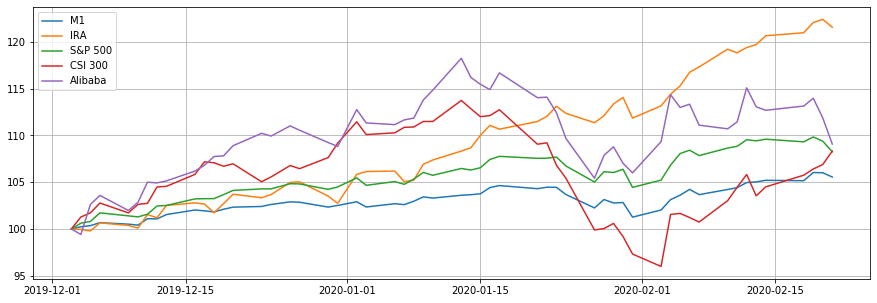

In [4]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 55)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 55)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR', 'BABA'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
    'Alibaba': data['BABA'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 5)

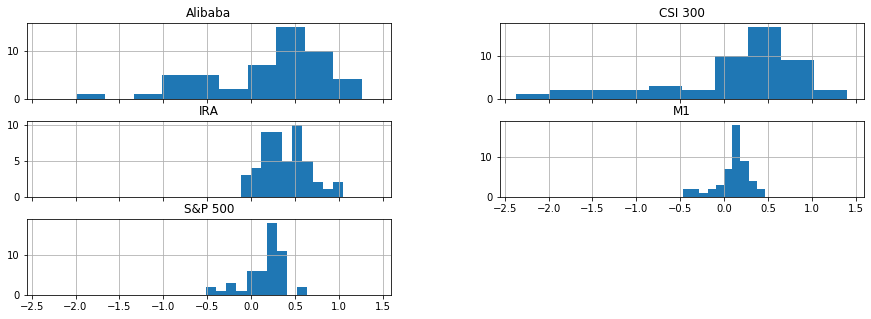

In [3]:
ret = frame.rolling(5).mean().pct_change() * 100
_ = ret.hist(sharex=1, figsize=(15, 5), layout=(3, 2))